<a href="https://colab.research.google.com/github/bandamakarsh/2303a53018-aiml-/blob/main/2303a53018_batch_46_akarsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/content/employee turnover.csv'
data = pd.read_csv(file_path, encoding='latin1')

print("Dataset Overview:")
print(data.info())
print("\nSample Data:")
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB
None

Sample Data:
        stag  even

<ipython-input-2-3030b0865141>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='event', y='extraversion', palette='coolwarm')


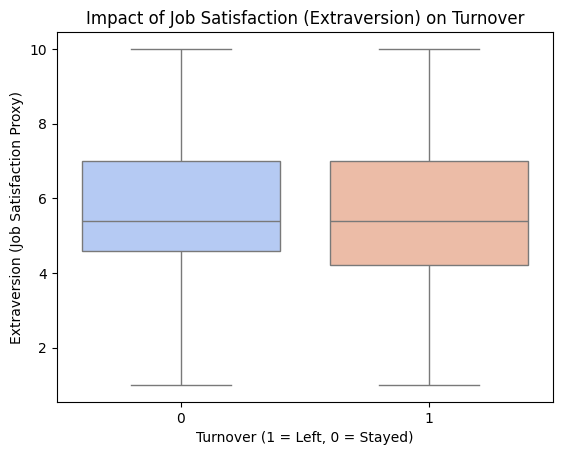

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=data, x='event', y='extraversion', palette='coolwarm')
plt.title('Impact of Job Satisfaction (Extraversion) on Turnover')
plt.xlabel('Turnover (1 = Left, 0 = Stayed)')
plt.ylabel('Extraversion (Job Satisfaction Proxy)')
plt.show()

In [ ]:

categorical_cols = ['gender', 'industry', 'profession', 'traffic', 'coach', 'head_gender', 'greywage', 'way']

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nData After One-Hot Encoding:")
print(data_encoded.head())



Data After One-Hot Encoding:
        stag  event   age  extraversion  independ  selfcontrol  anxiety  \
0   7.030801      1  35.0           6.2       4.1          5.7      7.1   
1  22.965092      1  33.0           6.2       4.1          5.7      7.1   
2  15.934292      1  35.0           6.2       6.2          2.6      4.8   
3  15.934292      1  35.0           5.4       7.6          4.9      2.5   
4   8.410678      1  32.0           3.0       4.1          8.0      7.1   

   novator  gender_m  industry_Agriculture  ...  traffic_rabrecNErab  \
0      8.3      True                 False  ...                 True   
1      8.3      True                 False  ...                False   
2      8.3     False                 False  ...                 True   
3      6.7     False                 False  ...                 True   
4      3.7      True                 False  ...                False   

   traffic_recNErab  traffic_referal  traffic_youjs  coach_no  coach_yes  \
0         

In [ ]:

missing_values = data_encoded.isnull().sum()
print("\nMissing Values Count:")
print(missing_values)

data_encoded = data_encoded.fillna(data_encoded.mean())

print("\nMissing Values After Imputation:")
print(data_encoded.isnull().sum())



Missing Values Count:
stag                              0
event                             0
age                               0
extraversion                      0
independ                          0
selfcontrol                       0
anxiety                           0
novator                           0
gender_m                          0
industry_Agriculture              0
industry_Banks                    0
industry_Building                 0
industry_Consult                  0
industry_IT                       0
industry_Mining                   0
industry_Pharma                   0
industry_PowerGeneration          0
industry_RealEstate               0
industry_Retail                   0
industry_State                    0
industry_Telecom                  0
industry_etc                      0
industry_manufacture              0
industry_transport                0
profession_BusinessDevelopment    0
profession_Commercial             0
profession_Consult                0
profe

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

X = data_encoded.drop('event', axis=1)
y = data_encoded['event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'\nModel Performance:')
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')



Model Performance:
Accuracy: 0.64
ROC-AUC Score: 0.64
